# Optics-matching example - Comparing to Bmad

Note: this tracks positrons. 


In [1]:
import numpy as np
from pmd_beamphysics import single_particle
from pmd_beamphysics.units import mec2
from pytao import Tao

import impact.z as IZ
from impact.tests.z.conftest import bmad_files
from impact.z.interfaces.bmad import plot_impactz_and_tao_stats, track_tao

## Initial Particles

In [2]:
energy = 10e6
pz = np.sqrt(energy**2 - mec2**2)

P0 = single_particle(x=0.0, pz=pz)

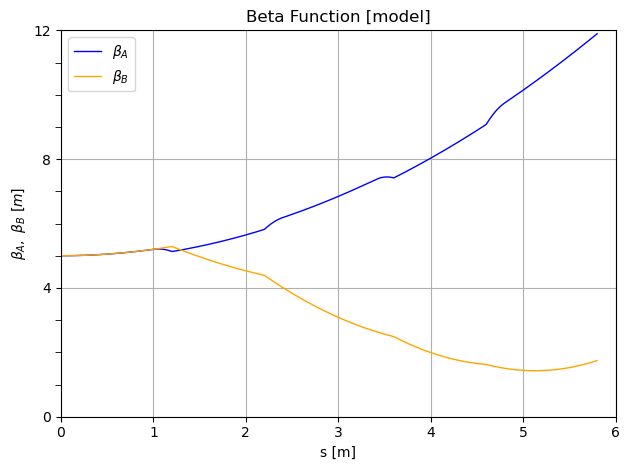

In [3]:
tao = Tao(lattice_file=bmad_files / "optics_matching.bmad", plot="mpl")
tao.plot("beta", include_layout=False)

In [4]:
# Match species
species = tao.branch1(ix_branch=0, ix_uni=1)["param_particle"].lower()
P0.species = species
species

'positron'

In [5]:
Ptao = track_tao(tao, P0)

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/24 [00:00<?, ?ele/s]

## Impact-Z

In [6]:
I = IZ.ImpactZ.from_tao(tao, initial_particles=P0)
I.input

ImpactZInput(
    initial_particles=<ParticleGroup with 1 particles at 0x7f562c69e900>,
    ncpu_y=1,
    ncpu_z=1,
    gpu=IZ.GPUFlag.disabled,
    seed=-1,
    n_particle=1,
    integrator_type=IZ.IntegratorType.linear_map,
    err=1,
    diagnostic_type=IZ.DiagnosticType.extended,
    nx=64,
    ny=64,
    nz=64,
    boundary_type=IZ.BoundaryType.trans_open_longi_open,
    radius_x=0.0,
    radius_y=0.0,
    z_period_size=0.0,
    distribution=IZ.DistributionType.read,
    restart=0,
    subcycle=0,
    nbunch=1,
    particle_list=[1],
    current_list=[0.0],
    charge_over_mass_list=[1.956951180916719e-06],
    twiss_alpha_x=0.0,
    twiss_beta_x=5.0,
    twiss_norm_emit_x=1e-06,
    twiss_mismatch_x=1.0,
    twiss_mismatch_px=1.0,
    twiss_offset_x=0.0,
    twiss_offset_px=0.0,
    twiss_alpha_y=0.0,
    twiss_beta_y=5.0,
    twiss_norm_emit_y=1e-06,
    twiss_mismatch_y=1.0,
    twiss_mismatch_py=1.0,
    twiss_offset_y=0.0,
    twiss_offset_py=0.0,
    twiss_alpha_z=1e-09,
    twiss_beta_z=1.0,
    twiss_norm_emit_z=1e-06,
    twiss_mismatch_z=1.0,
    twiss_mismatch_e_z=1.0,
    twiss_offset_phase_z=0.0,
    twiss_offset_energy_z=0.0,
    average_current=0.0,
    reference_kinetic_energy=9489001.04931,
    reference_particle_mass=510998.95069,
    reference_particle_charge=1.0,
    reference_frequency=1300000000.0,
    initial_phase_ref=0.0,
    lattice=[
        ToggleSpaceCharge(
            name='',
            metadata={},
            length=0.0,
            steps=0,
            map_steps=0,
            type_id=-14,
            unused=0.0,
            enable=False
        ),
        WriteFull(
            name='initial_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=100,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        ),
        Drift(
            name='P1',
            metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 2},
            length=1.0,
            steps=1,
            map_steps=1,
            type_id=0,
            radius=1.0
        ),
        Dipole(
            name='B1',
            metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 3},
            length=0.2,
            steps=11,
            map_steps=11,
            type_id=4,
            angle=0.1745329251994329,
            k1=0.0,
            input_switch=0.0,
            hgap=0.0,
            e1=0.0,
            e2=0.1745329251994329,
            entrance_curvature=0.0,
            exit_curvature=0.0,
            fint=0.0,
            misalignment_error_x=0.0,
            misalignment_error_y=0.0,
            rotation_error_x=0.0,
            rotation_error_y=0.0,
            rotation_error_z=0.0
        ),
        Drift(
            name='P2#1',
            metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 4},
            length=0.25,
            steps=1,
            map_steps=1,
            type_id=0,
            radius=1.0
        ),
        Quadrupole(
            name='P2\\Q1',
            metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 5},
            length=0.1,
            steps=1,
            map_steps=1,
            type_id=1,
            k1=0.0,
            file_id=-1.0,
            radius=0.03,
            misalignment_error_x=0.0,
            misalignment_error_y=0.0,
            rotation_error_x=0.0,
            rotation_error_y=0.0,
            rotation_error_z=-0.0
        ),
        Drift(
            name='P2#2',
            metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 6},
            length=0.2999999999999998,
            steps=1,
            map_steps=1,
            type_id=0,
            radius=1.0
        ),
        Quadrupole(
            name='P2\\Q2',
            metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 7},
            length=0.1,
            steps=1,
            map_steps=1,
            type_id=1,
            k1=0.0,
            file_id=-1.0,
            radius

In [7]:
output = I.run()

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/25 [00:00<?, ?it/s]

Detected species: positron


Detected species: positron


Detected species: positron


In [8]:
P = I.output.particles["final_particles"]

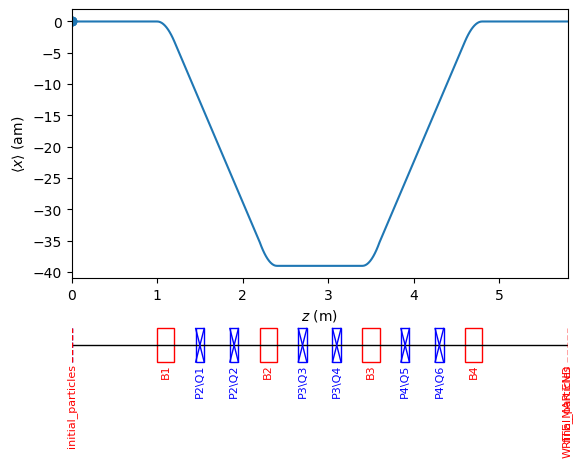

In [9]:
I.plot("mean_x", include_labels=True)

# Compare 

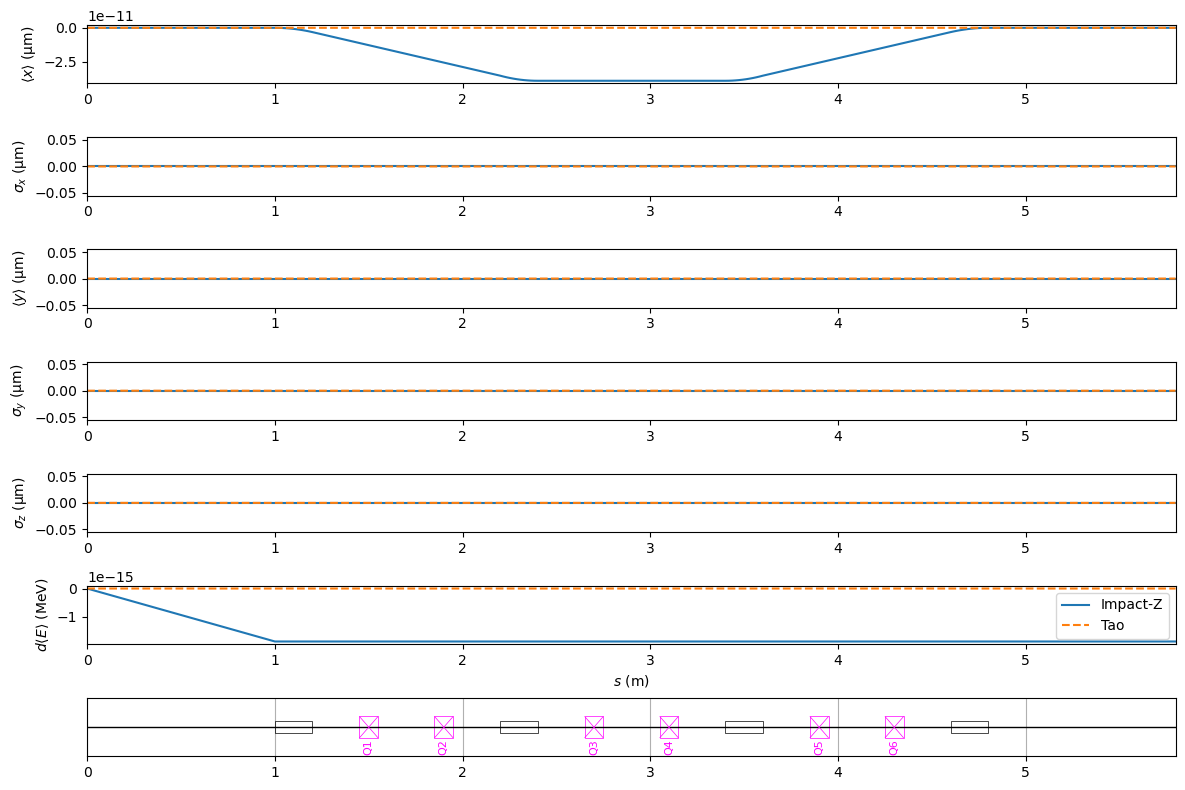

In [10]:
plot_impactz_and_tao_stats(I, tao)

In [11]:
Ptao.data

{'x': array([0.]),
 'px': array([0.]),
 'y': array([0.]),
 'py': array([0.]),
 'z': array([0]),
 'pz': array([9986935.46952186]),
 't': array([1.93720262e-08]),
 'status': array([1], dtype=int32),
 'weight': array([1.]),
 'species': np.str_('positron')}

In [12]:
P.data

{'x': array([-4.88439121e-31]),
 'px': array([-1.89911092e-24]),
 'y': array([0.]),
 'py': array([0.]),
 'z': array([0.]),
 'pz': array([9986935.46952185]),
 't': array([1.93720262e-08]),
 'status': array([1.]),
 'weight': array([1.e-20]),
 'id': array([1]),
 'species': np.str_('positron')}